# Data Visualization Using Python Workshop
## Session 2

Author: G. Gordon
Overview: Exploring the HR Analytics Data Set (source:)

Not to be re-used without written permission from author.

In [2]:
import numpy as np # import numpy package as use the alias np
import pandas as pd # import  pandas package as use the alias pd
import matplotlib.pyplot as plt # import pyplot from matplotlib package as use the alias plt
# plot all graphs and images in the notebook
%matplotlib inline 

### Importing Data

In [5]:
data_file='./hr_data.csv' # store path of data file in variable `data_file`

In [6]:
# import data from file into python pandas.DataFrame and store in variable `data`
data = pd.read_csv(data_file) 

In [7]:
data.head(10) # view first 10 records from data frame 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Renaming Columns

In [8]:
data.columns #View columns within data frame

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

In [9]:
data.columns.tolist() #View columns as python list within data frame

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [12]:
#retrieve all values from a column within a dataframe as a pandas.Series object
data["sales"] 
# Only display the last 5
data["sales"].tail(5)
# Randomly sample 8 items from pandas.Series
data["sales"].sample(8)

4391       technical
11230      technical
5385       technical
12986          sales
9075     product_mng
11113          sales
5561              IT
6294       technical
Name: sales, dtype: object

----
Since the ```sales``` column contains the names of department, we will rename the column to ```department```. We will rename the column using the following steps

-----------

In [16]:
# retrieve all column listing as a list
column_listing = data.columns.tolist()
# Change the name of the 9th columns (index 8) from `sales` to `department`
column_listing[8]='department'
# update the column names for the dataframe
data.columns = column_listing
#show the updated columns
data.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],
      dtype='object')

### Exploring the Data Set

In this section we will utilize aggregate methods available on each pandas.DataFrame or pandas.Series along with visualizations to answer questions about our dataset. Each question will be supported by sub-questions that will guide the exploration.

### Section 1 : How Satisfied are employees?

1. What is the average satisfaction level?
2. What is the range of satisfaction for all our employees?
3. What is the range of satisfaction for each department?
4. On average, which department is the most satisfied?

In [18]:
# Storing the satisfaction levels for each employees `emp_satisfaction`
emp_satisfaction = data['satisfaction_level']

In [22]:
# using the describe method to view the mean/average satisfaction along with quartile ranges
emp_satisfaction.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [26]:
# Using a for loop to print the values as a percentage instead of decimal numbers

# Retrieving statistics as a dictionary
emp_satisfaction_dict = emp_satisfaction.describe().to_dict()
#looping through each 
for aggregate_value in emp_satisfaction_dict:
    print("The employee satisfaction `%s` is %.2f" % (aggregate_value, emp_satisfaction_dict[aggregate_value] * 100))

The employee satisfaction `count` is 1499900.00
The employee satisfaction `std` is 24.86
The employee satisfaction `min` is 9.00
The employee satisfaction `max` is 100.00
The employee satisfaction `50%` is 64.00
The employee satisfaction `25%` is 44.00
The employee satisfaction `75%` is 82.00
The employee satisfaction `mean` is 61.28


Although quick, this may not be the best way to present these quick statistics. For example, multiplying the count by 100 gives us 100 more than the actual number of employees and all sentences may not be considered as immediately meaningful.

Another alternative is writing each statement individually, using the methods available on the pandas.Series object (The dictionary may be used if so desired. Can you use the dictionary to produce the same output as below?). 

In [38]:
print("The number of employees is %d. " % emp_satisfaction.count() )
print("The minimum satisfaction level of employees is %.1f %%." % (emp_satisfaction.min() * 100) )
print("While, the maximum satisfaction level of employees is %.1f %%." % (emp_satisfaction.max() * 100) )
print("The satisfaction level for most employees is between %.1f %% and %.1f %%, i.e. 25-75%% of responses." % 
      ((emp_satisfaction.quantile(0.25) * 100), (emp_satisfaction.quantile(0.75)*100)))

The number of employees is 14999. 
The minimum satisfaction level of employees is 9.0 %.
While, the maximum satisfaction level of employees is 100.0 %.
The satisfaction level for most employees is between 44.0 % and 82.0 %, i.e. 25-75% of responses.


While this is more meaningful, we spent a considerable amount of time preparing this information and our reader will spend a considerable amount of time perusing it. This questions could be answered using a boxplot (https://en.wikipedia.org/wiki/Box_plot).

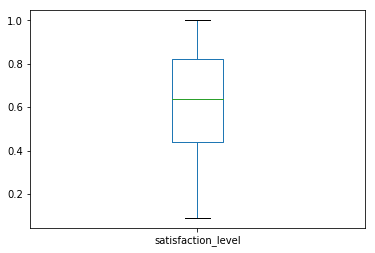

In [47]:
# Creating a box plot using matplotlib methods made available on the pandas.Series object
emp_satisfaction.plot.box()


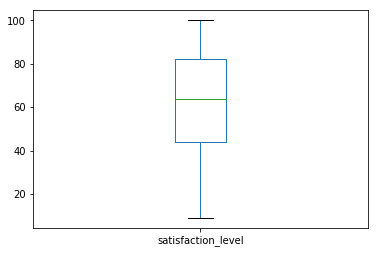

In [48]:
# Multiplying the decimal number for employee satisfaction by 100 before plotting boxplot
# Creating a box plot using matplotlib methods made available on the pandas.Series object
emp_satisfaction_percentage = (emp_satisfaction*100)
emp_satisfaction_percentage.plot.box()

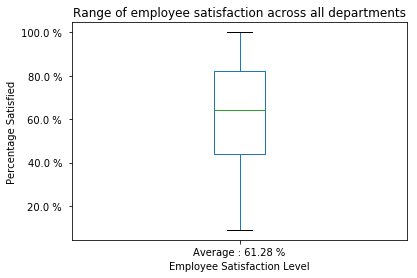

In [210]:
# Removing name from series before plotting
emp_satisfaction_percentage.name = ''
# The name of the series is used as the ticklabel / series name by default
# we will re-purpose this by placing the average here since the box plot does not show the average
emp_satisfaction_percentage.name = "Average : %.2f %%" % (emp_satisfaction_percentage.mean())
# setting the title of the boxplot and storing the boxplot axes in a variable `emp_satisfaction_boxplot_axes`
emp_satisfaction_boxplot_axes = emp_satisfaction_percentage.plot.box(title="Range of employee satisfaction across all departments")
# Changing the label on the x and y axis labels respectively
emp_satisfaction_boxplot_axes.set_xlabel("Employee Satisfaction Level")
emp_satisfaction_boxplot_axes.set_ylabel("Percentage Satisfied")
# Changing the tick labels on the y axis from 20,40,60,80,100 to all end with percentage

# First format tick labels
emp_satisfaction_boxplot_axes_yticklabels = [ "%.1f %% " % label for label in [0,20,40,60,80,100] ]

# Apply updated tick labels
emp_satisfaction_boxplot_axes.set_yticklabels(emp_satisfaction_boxplot_axes_yticklabels)


Congratulations, you have successfully showed the range of satisfaction levels across the company. Let's see if we can do the same for each department within the company?

In [110]:
# Retrieve satisfaction level and department data only
department_satisfaction_level_data = data[['department','satisfaction_level']]
# Group satisfaction_level data by department
department_satisfaction_levels_groups = department_satisfaction_level_data.groupby('department')


In [111]:
# We will be utilizing some methods from the python math library henceforth
import math

In [138]:
# get number of departments/groups
no_depts = data['department'].nunique() # `nunique` method returns number of unique values
# We would like to plot the graphs in two columns, we will calculate the number of rows required
no_depts_rows = no_depts / 2
no_dept_columns = 2
# in the event that this is a decimal value, lets round the number up
no_depts_rows = math.ceil(no_depts_rows)
#let's also convert this to an integer
no_depts_rows = int(no_depts_rows)

print("Number of department rows and columns in the format (rows, columns) - (%d,%d)" % (no_depts_rows,no_dept_columns ) )
    





Number of department rows and columns in the format (rows, columns) - (5,2)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113b82490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114d8d910>], dtype=object)

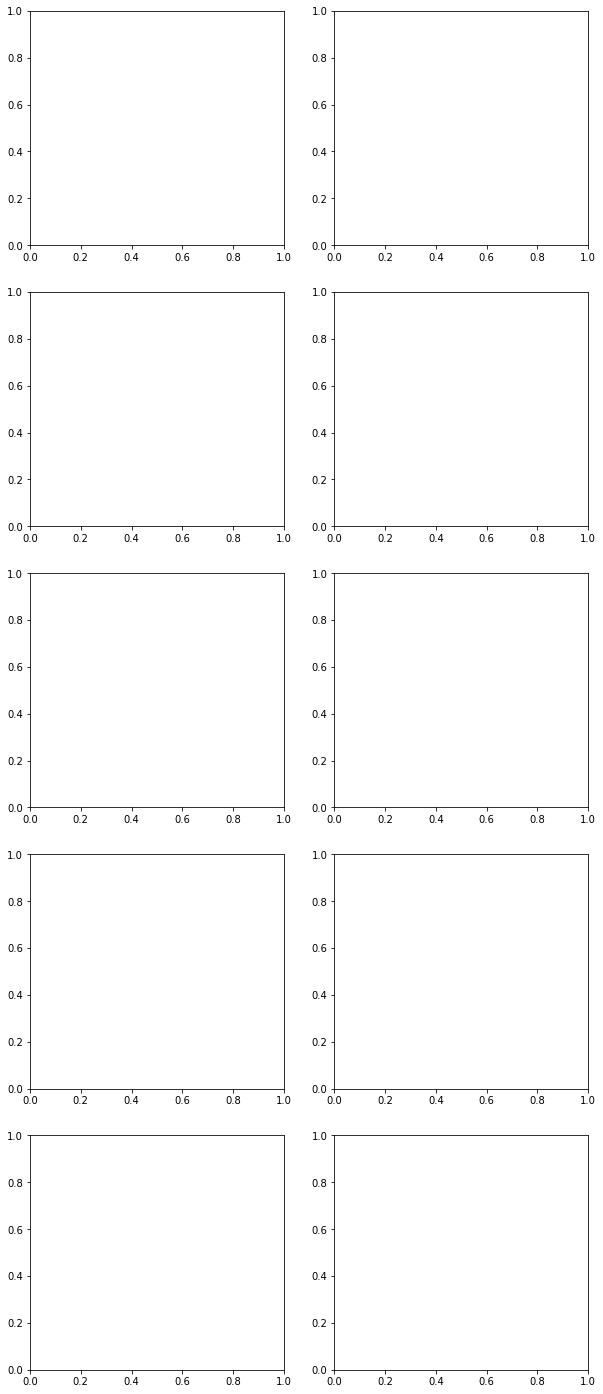

In [207]:
# create a special figure with axes for subplots using `no_depts_rows` and `no_dept_columns`
# set the width to 10 units
# set the hight to 25 units
#save the figure and axis in variables for later use
dept_satisfaction_levels_figure, dept_satisfaction_levels_axes = plt.subplots(no_depts_rows, no_dept_columns,figsize=(10,25))

# since we get a 2 dimensional array for axis (4 rows, 2 columns) we will convert it to a 1 dimensional
# array for easier use (8 rows) i.e. we can index the array from 0-7
dept_satisfaction_levels_axes = dept_satisfaction_levels_axes.flatten()

dept_satisfaction_levels_axes

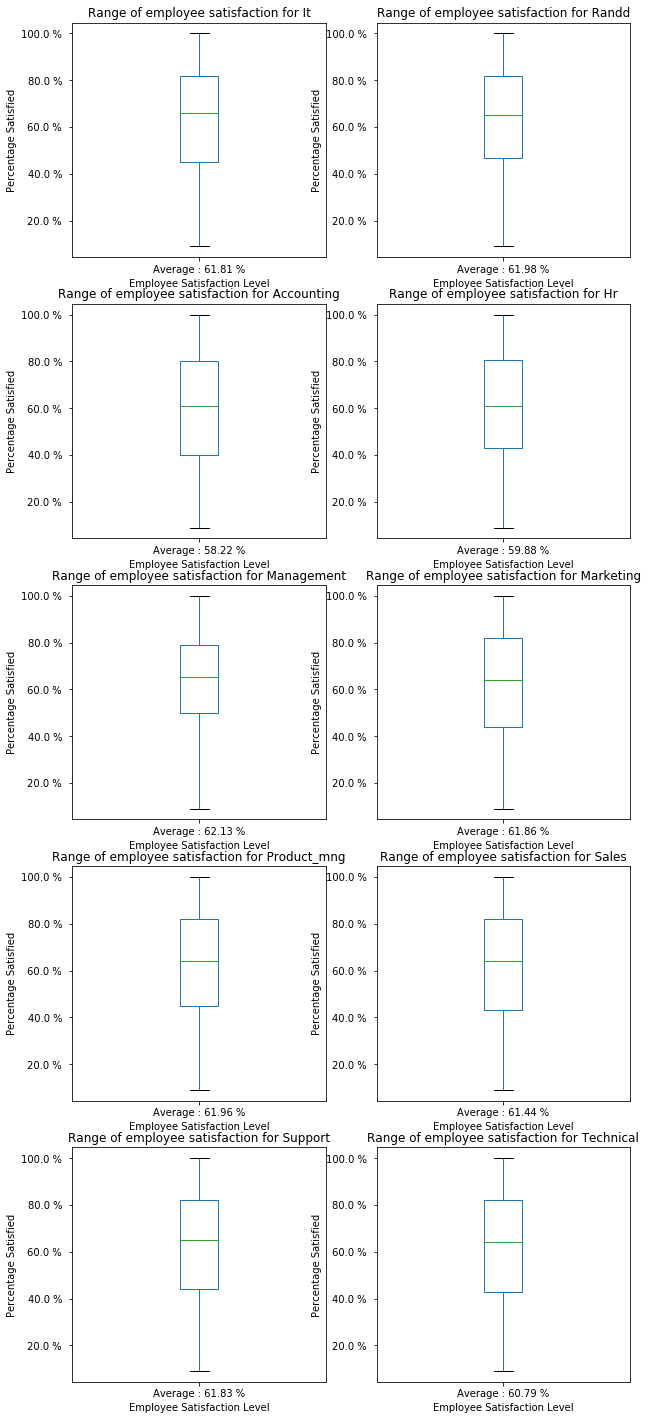

In [208]:
# let us save these labels since each graph will use them
yticklabels = [ "%.1f %% " % label for label in [0,20,40,60,80,100] ]

# We would like to plot on each department on each axis
# The number of departments and the number of axis are currently the same
# We will `zip` these together and extract the (group_name,group_data),axes in a for loop
for (group_name,group_data),axes in zip(department_satisfaction_levels_groups,dept_satisfaction_levels_axes):
    # for each group
    
    # Create a custom title
    title = "Range of employee satisfaction for %s" % group_name.capitalize()
    # Plot the graph on the correct axis
    group_data.plot.box(title=title,ax=axes)
    
    #Perform modifications as before
    axes.set_xticklabels(["Average : %.2f %%" % (group_data.mean() *100)])
    axes.set_xlabel("Employee Satisfaction Level")
    axes.set_ylabel("Percentage Satisfied")
    axes.set_yticklabels(yticklabels)
# show plots
dept_satisfaction_levels_figure

In [146]:
# How about determining which department on average has the highest satisfaction level?
department_satisfaction_levels_groups.mean()

,satisfaction_level
department,
IT,0.618142
RandD,0.619822
accounting,0.582151
hr,0.598809
management,0.621349
marketing,0.618601
product_mng,0.619634
sales,0.614447
support,0.618300


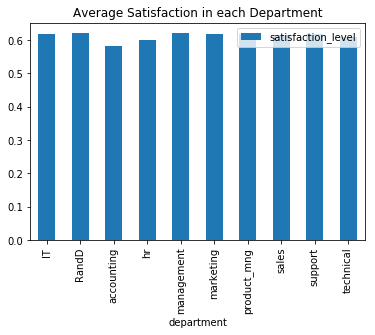

In [148]:
# plotting average satisfaction level for each department using a bar plot
department_satisfaction_levels_groups.mean().plot.bar(title="Average Satisfaction in each Department")

Visually, it seems the satisfaction level, may not vary that much between departments. We will continue our investigation with other questions, but before we do so, can you carry out a similar investigation for the employee last evaluation score (`last_evaluation`) ?

----
#### Exercise Questions:

1. What is the average evaluation score on the last evaluation?
2. What is the range of evaluation scores on the last evaluation for all our employees?
3. What is the range of evaluation scores on the last evaluation for each department?
4. On average, which department has the highest evaluation score on the last evaluation?

### Section 2 : Are work accidents impacting our employee retention?

1. How many employees do we have remaining?
2. What percentage of employees remaining experienced a work accident?
3. Can you show me the number of employees who are `remaning and experienced an accident`, `remaning and did not experience an accident`, `not remaning and experienced an accident` and `not remaning and did not experience an accident`?

In [170]:
# The fields we will focus on include
fields = ['Work_accident','left']
# we will extract data from these columns and store in a variable called `retention_data`
retention_data = data[fields]
#Let's look at a sample of 8 items from this extracted data set
retention_data.sample(8) # NB This wil return a different sample each time

,Work_accident,left
7813,0,0
11473,0,0
6853,0,0
8850,1,0
14942,0,1
1995,0,1
14661,0,1
13334,0,0


----
Interesting, it seems as if they have used 
 - 0 to represent NO
 - 1 to represent YES

How about we relabel these values to YES and NO accodingly. 

We will create a function, that will accept a numerical value, if the value is 1 it will return "Yes", if the value is 0 it will return  "No". We will call it encode_responses_to_yes_no.

In [171]:
def encode_responses_to_yes_no(number_value):
    if number_value == 1:
        return "Yes"
    else:
        return "No"
    
# NB this could also be done using a lambda expression as denoted below
encode_responses_to_yes_no = lambda number_value : "Yes" if number_value == 1 else "No"

In [172]:
# Lets transform the data in work accident

# We map apply this method to a column/series in the data set and update it's values accordingly
retention_data["Work_accident"].apply(encode_responses_to_yes_no)
#retention_data.sample(8)


0         No
1         No
2         No
3         No
4         No
5         No
6         No
7         No
8         No
9         No
10        No
11        No
12        No
13        No
14        No
15        No
16        No
17        No
18       Yes
19        No
20        No
21        No
22        No
23        No
24        No
25        No
26        No
27        No
28        No
29        No
        ... 
14969     No
14970     No
14971     No
14972     No
14973     No
14974     No
14975     No
14976     No
14977     No
14978     No
14979     No
14980     No
14981     No
14982     No
14983     No
14984     No
14985     No
14986     No
14987     No
14988     No
14989    Yes
14990    Yes
14991     No
14992     No
14993     No
14994     No
14995     No
14996     No
14997     No
14998     No
Name: Work_accident, Length: 14999, dtype: object

In [173]:
# Since we would like to apply it to all columns we will use the `applymap` method
# We will also store the result in the retention_data variable
retention_data = retention_data.applymap(encode_responses_to_yes_no)
# Viewing a sample of 8 employee responses
retention_data.sample(8)

,Work_accident,left
1217,No,Yes
4901,Yes,No
9718,Yes,No
13295,No,No
11158,No,No
12345,No,Yes
10287,No,No
1951,No,Yes


In [193]:
# Let's determining, how many employees we have remaining
# i.e. how many have responded `No` in the `left` column
num_employees = retention_data['left'].count()
print("Number of employees : %d" % (num_employees) )
# we will use the `query` method and the logical operator `==` to compare responses
# The `query` method filters our datasets based on the condition `left == "No"`
num_employees_remaining = retention_data.query('left == "No"')['left'].count()
print("Number of employees remaining: %d " % num_employees_remaining  )
#converting to a float
#because an int/int gives an int and we would like decimal places and not just 0/100
num_employees_remaining = float(num_employees_remaining)

print("Percentage remaining: %.1f %%" %  (num_employees_remaining/num_employees *100 ) )

Number of employees : 14999
Number of employees remaining: 11428 
Percentage remaining: 76.2 %


Although, we could do the same to answer how many employees remaining experienced a work accident, let us use a pie chart. Pie charts are useful for expressing percentages of a whole.

In [204]:
# This time we will save the remaining employees
employees_remaining = retention_data['left']
# We will use the `value_counts` method to count the number of Yes/No response in each group
# NB. This method is only available on Series objects
employees_remaining_counts = employees_remaining.value_counts()
employees_remaining_counts

No     11428
Yes     3571
Name: left, dtype: int64

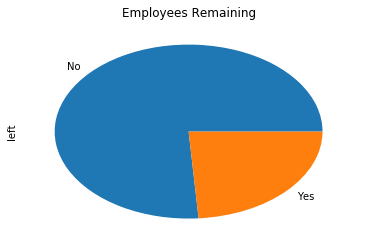

In [205]:
# plotting the responses on a pie chart
employees_remaining_counts.plot.pie(title="Employees Remaining")

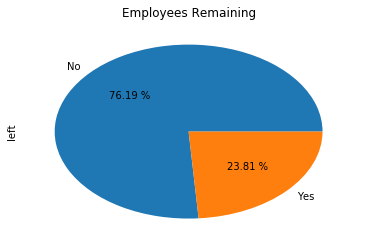

In [211]:
# Similar options are available on the pie chart
# Let us also include the percentage
employees_remaining_counts.plot.pie(title="Employees Remaining",autopct="%.2f %%")

In [198]:
#lets group the employees based on those who are remaining
retention_data_grouped = retention_data.groupby('left')
# We will use the `value_counts` method to count the number of Yes/No response in each group
# NB. This method is only available on Series objects
retention_data_grouped['Work_accident'].value_counts()

left  Work_accident
No    No               9428
      Yes              2000
Yes   No               3402
      Yes               169
Name: Work_accident, dtype: int64

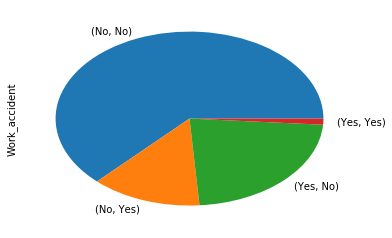

In [199]:
# let's save this data
retention_data_grouped_counts = retention_data_grouped['Work_accident'].value_counts()
# plotting the data using a pie chart
retention_data_grouped_counts.plot(kind="pie")

It seems we are now experiencing a common dilemma, Should we relabel our values to show more distinct groups? Should we try a bar graph instead?

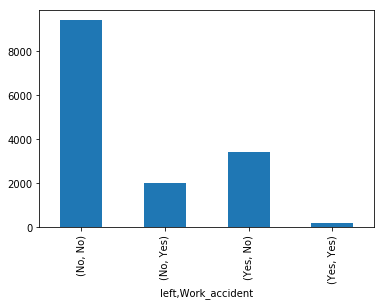

In [219]:
# Re-labelling is an option, similar to how we did before, however let's explore the 
# bar chart option
# We may plot a bar chart using a pandas.Series or pandas.DataFrame by passing 'kind="bar"'
# to the plot method as denoted below.
retention_data_grouped_counts.plot(kind="bar")

In [222]:
#This is still ambiguous, the key is to unstack the value counts first
unstacked_retention_data_grouped_counts = retention_data_grouped_counts.unstack()
unstacked_retention_data_grouped_counts

Work_accident,No,Yes
left,,
No,9428,2000
Yes,3402,169


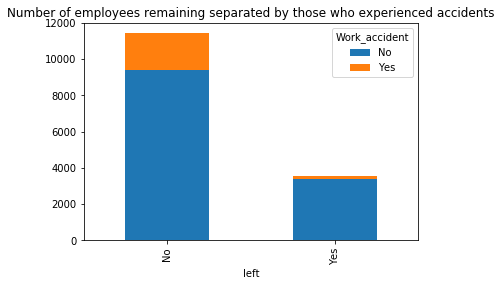

In [224]:
# Let's attempt another plot
title="Number of employees remaining separated by those who experienced accidents"
unstacked_retention_data_grouped_counts.plot(kind="bar",stacked=True,title=title)

Other charts are also possible, including:
1. 'line' : line plot (default)
1. 'bar' : vertical bar plot
1. 'barh' : horizontal bar plot
1. 'hist' : histogram
1. 'box' : boxplot
1. 'kde' : Kernel Density Estimation plot
1. 'density' : same as 'kde'
1. 'area' : area plot
1. 'pie' : pie plot
1. 'scatter' : scatter plot
1. 'hexbin' : hexbin plot

Simply change the value for the kind paramter, as denoted below:

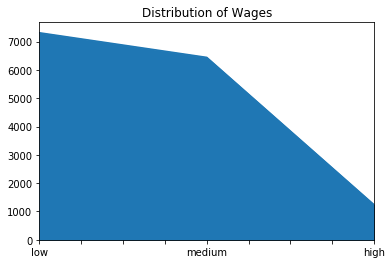

In [235]:
data["salary"].value_counts().plot(kind='area',title="Distribution of Wages")

In [239]:
# Let's take another look at the columns, but this time view their data types
data.sample(100).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


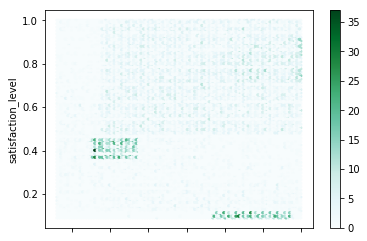

In [256]:
# We may also plot a hexbin 
data.plot(kind="hexbin",x="last_evaluation",y="satisfaction_level")

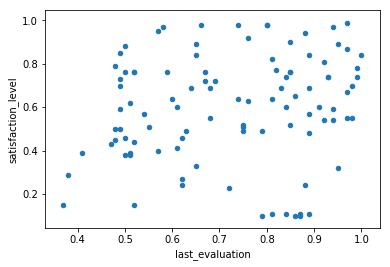

In [258]:
# Scatter plots, similar to hexbins, require that you specify the x and y values
data.sample(100).plot(kind="scatter",x="last_evaluation",y="satisfaction_level")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c830410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e2bea50>]], dtype=object)

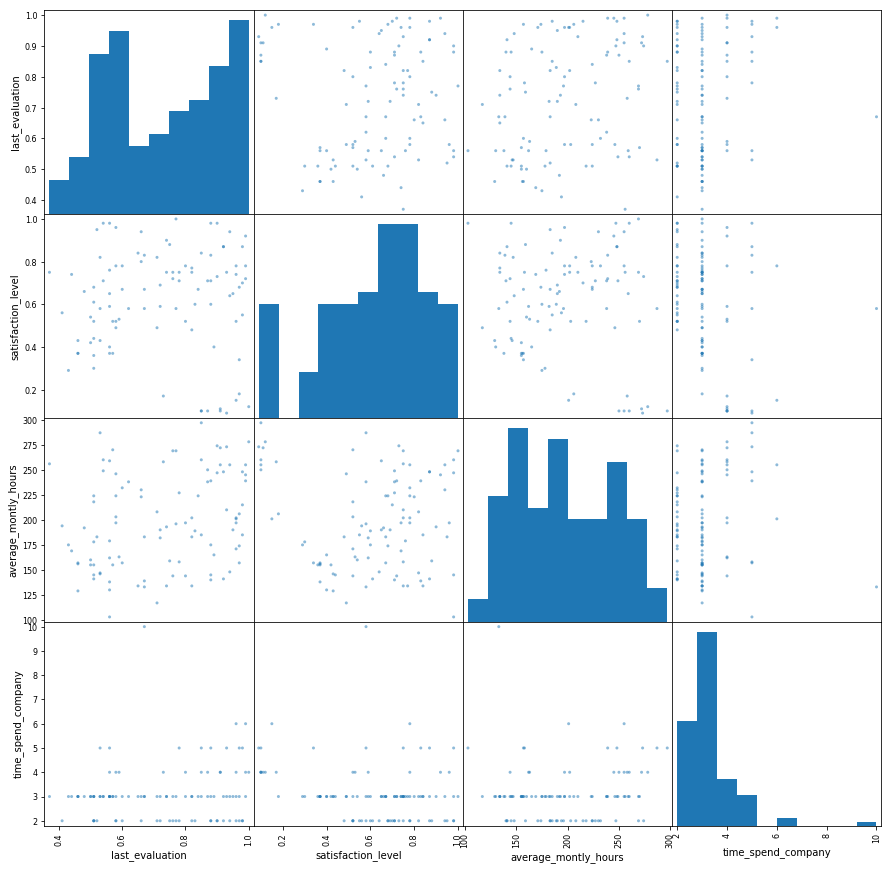

In [262]:
# We may also use a scatter matrix to plot multiple columns as x and y simultaneously

#Let's sample 100 employees first and retrieve only the 'last_evaluation','satisfaction_level',
# 'average_montly_hours' and 'time_spend_company'

# Are there any related columns here?
possibly_related_columns = ['last_evaluation','satisfaction_level','average_montly_hours','time_spend_company']
sample_100 = data.sample(100)[possibly_related_columns]

# using the scatter_matrix method
pd.plotting.scatter_matrix(sample_100, figsize=(15,15))

The next session we will continue to create an interactive dashboard. 

### Exercises

1. Using the data create an appropriate chart for each of the chart types. 

Tip: It is useful to start with a question. Have fun developing this exploratory skill!